<a href="https://colab.research.google.com/github/tmquan11032003/Machine_Learning/blob/main/Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Theo cách thầy

In [2]:
#import thư viện
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf #Plot tìm Hyperparameter
import matplotlib.pyplot as plt
from pandas import read_csv
from pandas import datetime # xử lý dữ liệu về ngày tháng
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120}) #Cài đặt kích thước cho toàn bộ các hình trong file notebook này giống nhau

<ipython-input-2-07177172f404>:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime # xử lý dữ liệu về ngày tháng


In [1]:
#Hàm xử lý ngày tháng
def parser(x):
	return datetime.strptime('199'+x, '%Y-%m')

In [3]:
# Import data (Nguồn: https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/)
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
data=df.values

<ipython-input-3-004c5e74f389>:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)


In [4]:
df

Month
1991-01-01    266.0
1991-02-01    145.9
1991-03-01    183.1
1991-04-01    119.3
1991-05-01    180.3
1991-06-01    168.5
1991-07-01    231.8
1991-08-01    224.5
1991-09-01    192.8
1991-10-01    122.9
1991-11-01    336.5
1991-12-01    185.9
1992-01-01    194.3
1992-02-01    149.5
1992-03-01    210.1
1992-04-01    273.3
1992-05-01    191.4
1992-06-01    287.0
1992-07-01    226.0
1992-08-01    303.6
1992-09-01    289.9
1992-10-01    421.6
1992-11-01    264.5
1992-12-01    342.3
1993-01-01    339.7
1993-02-01    440.4
1993-03-01    315.9
1993-04-01    439.3
1993-05-01    401.3
1993-06-01    437.4
1993-07-01    575.5
1993-08-01    407.6
1993-09-01    682.0
1993-10-01    475.3
1993-11-01    581.3
1993-12-01    646.9
Name: Sales, dtype: float64

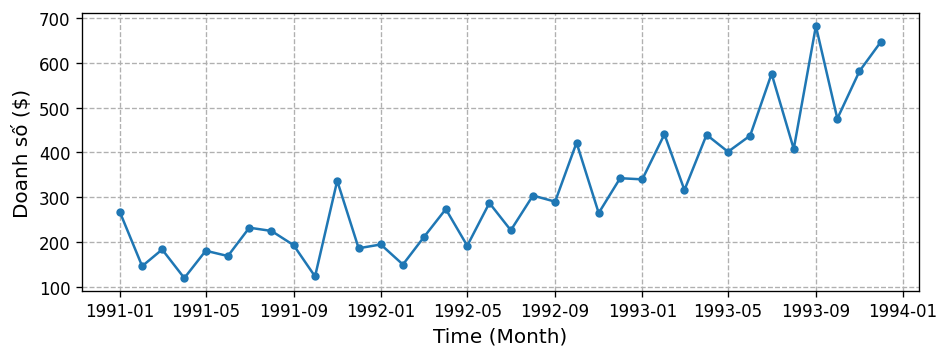

In [6]:
#Hiển thị dữ liệu gốc
plt.plot(df,'.-', markersize=8)
plt.grid(linestyle='--')
plt.ylabel('Doanh số ($)',fontsize=12)
plt.xlabel('Time (Month)',fontsize=12);

## Tìm Moving Average

### a. Cách thủ công

In [16]:
# Chúng ta thử tính Moving average bằng cách thủ công:
# Program to calculate moving average
MA=3 #Test với MA là 3, có thể thay MA=2 3 4 5 6... để test
df_MA = [] # Tạo 1 list rỗng để truyền dữ liệu tính MA vào đó
i=0
while i < len(data) - MA + 1:
    j = data[i : i + MA] #lựa chọn data để tính trung bình
    j_average = round(sum(j) / MA, 2) #tính trung bình (MA), làm tròn tới 2 chữ số thập phân
    df_MA.append(j_average) # append giá trị vào list rỗng đã khai báo
    i += 1
print(df_MA)


[198.33, 149.43, 160.9, 156.03, 193.53, 208.27, 216.37, 180.07, 217.4, 215.1, 238.9, 176.57, 184.63, 210.97, 224.93, 250.57, 234.8, 272.2, 273.17, 338.37, 325.33, 342.8, 315.5, 374.13, 365.33, 398.53, 385.5, 426.0, 471.4, 473.5, 555.03, 521.63, 579.53, 567.83]


### b. Dùng hàm rolling

In [10]:
# Chúng ta thử tính Moving average bằng cách dùng thư viện pandas (hàm rolling có sẵn trong pandas):
MA=3
j = df.rolling(MA)
j_averages = round(j.mean(),2)
j_averages_list = j_averages.tolist() # Đổi kiểu pandas frame về kiểu list
df_MA2= j_averages_list[MA - 1:]
print(df_MA2)

[198.33, 149.43, 160.9, 156.03, 193.53, 208.27, 216.37, 180.07, 217.4, 215.1, 238.9, 176.57, 184.63, 210.97, 224.93, 250.57, 234.8, 272.2, 273.17, 338.37, 325.33, 342.8, 315.5, 374.13, 365.33, 398.53, 385.5, 426.0, 471.4, 473.5, 555.03, 521.63, 579.53, 567.83]


### Vẽ plot tương quan để so sánh sự chính xác khi chọn MA

[178.92, 159.42, 176.6, 184.88, 199.58, 188.1, 221.7, 212.52, 206.48, 197.82, 215.26, 202.62, 203.72, 222.26, 237.56, 256.26, 259.58, 305.62, 301.12, 324.38, 331.6, 361.7, 340.56, 375.52, 387.32, 406.86, 433.88, 452.22, 500.76, 515.56, 544.34, 558.62]


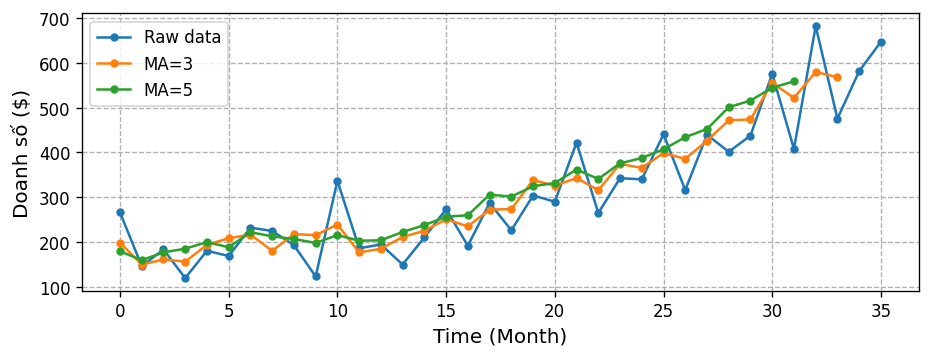

In [18]:
#chúng ta thử vẽ đường MA=3, MA=5
MA=5 #Test với MA là 3, có thể thay MA=2 3 4 5 6... để test
df_MA5 = [] # Tạo 1 list rỗng để truyền dữ liệu tính MA vào đó
i=0
while i < len(data) - MA + 1:
    j = data[i : i + MA] #lựa chọn data để tính trung bình
    j_average = round(sum(j) / MA, 2) #tính trung bình (MA), làm tròn tới 1 chữ số thập phân
    df_MA5.append(j_average) # append giá trị vào list rỗng đã khai báo
    i += 1
print(df_MA5)

plt.plot(df.values,'.-', markersize=8)
plt.plot(df_MA,'.-', markersize=8)
plt.plot(df_MA5,'.-', markersize=8)
plt.grid(linestyle='--')
plt.ylabel('Doanh số ($)',fontsize=12)
plt.xlabel('Time (Month)',fontsize=12)
plt.legend(['Raw data','MA=3','MA=5'])

### Sử dụng Package để tìm MA (plot_acf, plot_pacf)

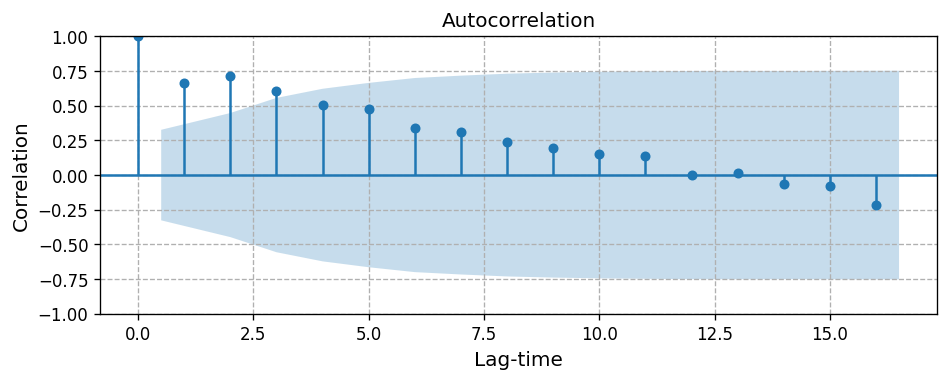

In [19]:
# Vẽ tương quan giữa data gốc với các chuỗi MA (Tìm MA)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df.values) #Hàm vẽ ACF
plt.grid(linestyle='--')
plt.ylabel('Correlation',fontsize=12)
plt.xlabel('Lag-time',fontsize=12)
plt.show()

Chọn MA = 3

## Tìm AutoRegressiven (AR)

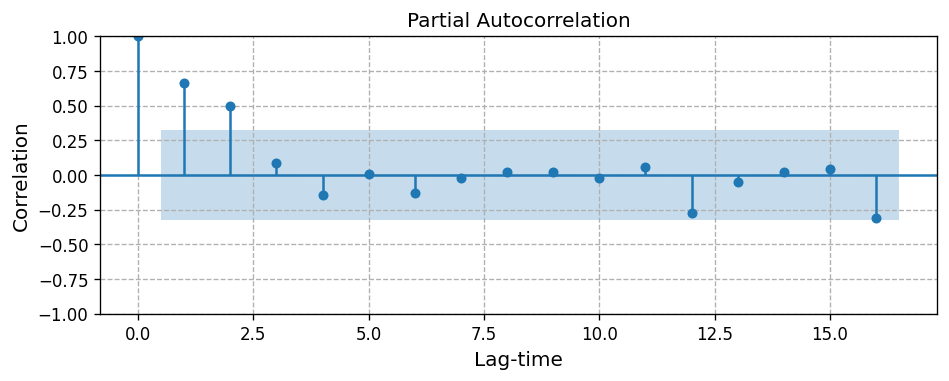

In [20]:
# Vẽ tương quan giữa data gốc với các lag-time của nó- tự tương quan (AR) (Tìm AR)
plot_pacf(df.values) #Hàm vẽ PACF
plt.grid(linestyle='--')
plt.ylabel('Correlation',fontsize=12)
plt.xlabel('Lag-time',fontsize=12)
plt.show()

chọn AR = 2

## Xây dựng Mô hình ARIMA

In [21]:
#Dự báo với mô hình ARIMA
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [22]:
X=df.values

In [23]:
len(X)

36

In [25]:
size = int(len(X) * 0.7)
#size

In [26]:
size = int(len(X) * 0.7)
train, test = X[0:size], X[size:len(X)]
history = [i for i in train]
predictions = []
#Dự báo 1 bước thời gian
for t in range(len(test)):
	model = ARIMA(history, order=(2,1,3)) #cài đặt p(AR), d(I), q(MA)
	model_fit = model.fit()
	output = model_fit.forecast()# Dự báo cho t+1
	y_pred = output[0] # Giá trị dự báo t+1
	predictions.append(y_pred)
	obs = test[t] #26
	history.append(obs)
	print('Giá trị dự báo=%f, Giá trị thực tế=%f' % (y_pred, obs)) # Hiển thị giá trị dự báo của từng bước thời gian
# evaluate forecasts
mse=mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('MSE: %.2f' % mse)
print('RMSE: %.2f' % rmse)

Giá trị dự báo=365.788199, Giá trị thực tế=440.400000
Giá trị dự báo=362.017420, Giá trị thực tế=315.900000
Giá trị dự báo=423.407792, Giá trị thực tế=439.300000
Giá trị dự báo=375.000827, Giá trị thực tế=401.300000
Giá trị dự báo=455.359394, Giá trị thực tế=437.400000
Giá trị dự báo=421.618882, Giá trị thực tế=575.500000


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Giá trị dự báo=453.364247, Giá trị thực tế=407.600000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Giá trị dự báo=536.497087, Giá trị thực tế=682.000000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Giá trị dự báo=512.715258, Giá trị thực tế=475.300000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Giá trị dự báo=670.716842, Giá trị thực tế=581.300000
Giá trị dự báo=606.511275, Giá trị thực tế=646.900000
MSE: 6084.72
RMSE: 78.00


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [27]:
output

array([606.51127488])

In [28]:
y_pred = output[0]

In [29]:
y_pred

606.5112748761295

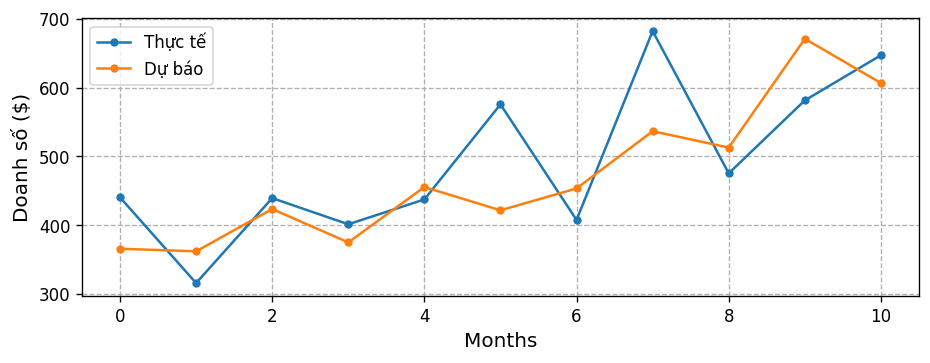

In [30]:
#Hiển thị dữ liệu trong test set và dữ liệu dự báo
plt.plot(test,'.-', markersize=8)
plt.plot(predictions,'.-', markersize=8)
plt.grid(linestyle='--')
plt.ylabel('Doanh số ($)',fontsize=12)
plt.xlabel('Months',fontsize=12)
plt.legend(['Thực tế','Dự báo'])

## Test thử nếu gán trực tiếp y_pred và lấy y_pred để tiếp tục dự đoán

In [31]:
#Ví dụ dự báo nhiều bước thời gian
X=df.values
size = int(len(X) * 0.7)
train, test = X[0:size], X[size:len(X)]
history = [i for i in train]
predictions = []
#Dự báo 11 bước thời gian
for t in range(11):
	model = ARIMA(history, order=(3,1,2)) #cài đặt p(AR), d(I), q(MA)
	model_fit = model.fit()
	output = model_fit.forecast()# Dự báo cho toàn bộ chuỗi thời gian
	y_pred = output[0] # Giá trị dự báo t+1
	predictions.append(y_pred)
	#obs = test[t]
	history.append(y_pred)
	#print('Giá trị dự báo=%f, Giá trị thực tế=%f' % (y_pred, obs)) # Hiển thị giá trị dự báo của từng bước thời gian
# evaluate forecasts
#mse=mean_squared_error(test, predictions)
#rmse = sqrt(mse)
#print('MSE: %.2f' % mse)
#print('RMSE: %.2f' % rmse)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarn

In [32]:
predictions

[384.94543918112106,
 351.17663301321556,
 335.9769977733705,
 324.95933775113434,
 355.9343337684475,
 366.5514060401438,
 357.1621707852727,
 333.14673403686436,
 334.52116867368176,
 352.09745544431416,
 364.46293320444784]

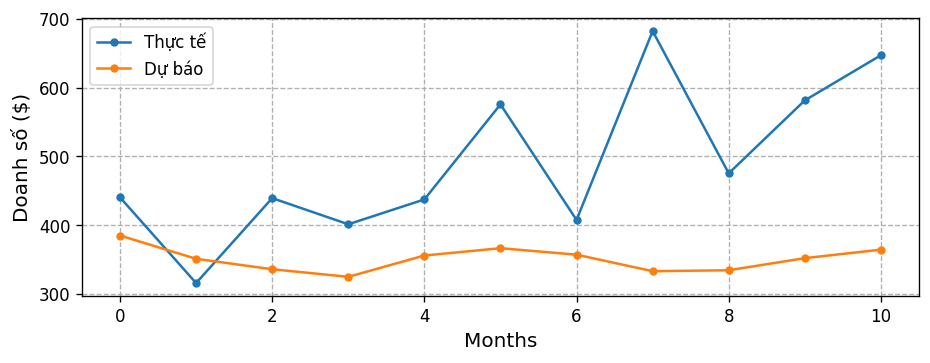

In [34]:
#Hiển thị dữ liệu trong test set và dữ liệu dự báo
plt.plot(test,'.-', markersize=8)
plt.plot(predictions,'.-', markersize=8)
plt.grid(linestyle='--')
plt.ylabel('Doanh số ($)',fontsize=12)
plt.xlabel('Months',fontsize=12)
plt.legend(['Thực tế','Dự báo']);

Chỉ đủng 0 và 1, còn lại sai và đi lệch rất nhiều hầu như là 1 đường thẳng

## Cách 2: Auto ARIMA:
- Để xây dựng mô hình ARIMA (Không tối ưu lắm) (Chủ yếu tìm các hyperparameter)

In [35]:
#Dùng auto arima để lựa chọn AR-p,I-d,MA-q
#Thư viện cung cấp phương pháp test adf và chỉ số AIC, chỉ số AIC càng nhỏ thì mô hình càng phù hợp
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.2 MB/s eta 0:00:00


In [36]:
import pmdarima as pm

In [37]:
model = pm.auto_arima(train, start_p=1, start_q=1,
                      test='kpss',      # use kpss test to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      information_criterion='oob',
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
print(model.summary())

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:35: UserWarning: information_criterion cannot be 'oob' with out_of_sample_size = 0. Falling back to information criterion = aic.
  warnings.warn('information_criterion cannot be \'oob\' with '


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=273.183, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=286.959, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=275.485, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=284.988, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=273.521, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=276.604, Time=0.08 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=273.988, Time=0.04 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 1.026 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SA

Thay bộ giá trị p, d,q vào mô hình trên để xem sự thay đổi của giá trị RMSE (Best model:  ARIMA(1,1,1))

# Theo cách anh Quang

In [38]:
# data
import numpy as np
import pandas as pd
# plots
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams["figure.figsize"] = (7,5)
# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
# metrics
from sklearn.metrics import mean_squared_error
# filter out warning
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

In [39]:
file_url = 'https://drive.google.com/file/d/1_CHVkQJFd5pbnFP6Hl_6RlG8ZbjkibuX/view?usp=sharing'
file_id = file_url.split('/')[-2]
url = 'https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(url, encoding='unicode_escape')
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


## Pre-processing

In [40]:
# 2001 -> 2003
df['Month'] = '200' + df['Month']
df['Month'] = pd.to_datetime(df['Month'])

In [41]:
df = df.set_index('Month')

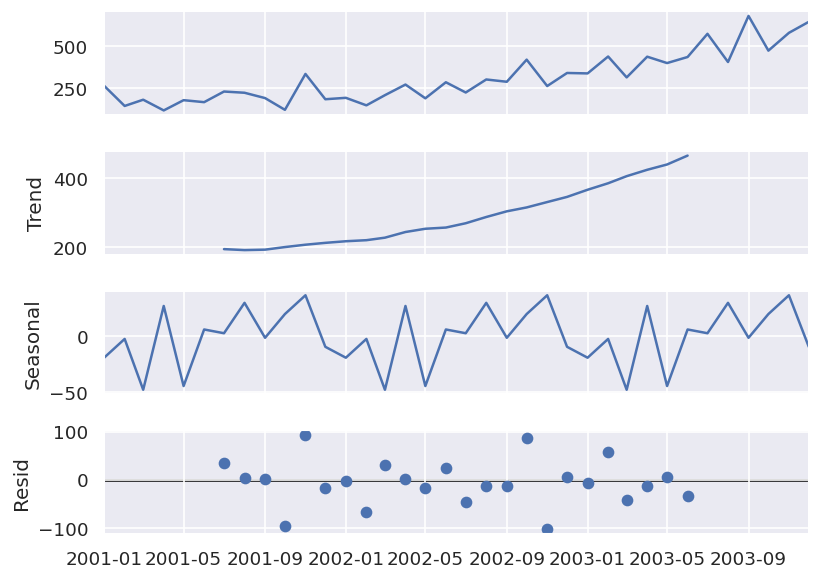

In [42]:
# Xem được các yếu tố như: trend, seasonal, resid
# component
decomposed = seasonal_decompose(df)
# print(decomposed.trend)
# print(decomposed.seasonal)
# print(decomposed.resid)
decomposed.plot();

## Xây dựng mô hình ARIMA

In [43]:
# split train test 0.7, 0.3
split_frac = 0.7
split_index = int(df.shape[0] * split_frac)
train_data = df.iloc[: split_index]
test_data = df.iloc[split_index: ]

### a. Tìm AR


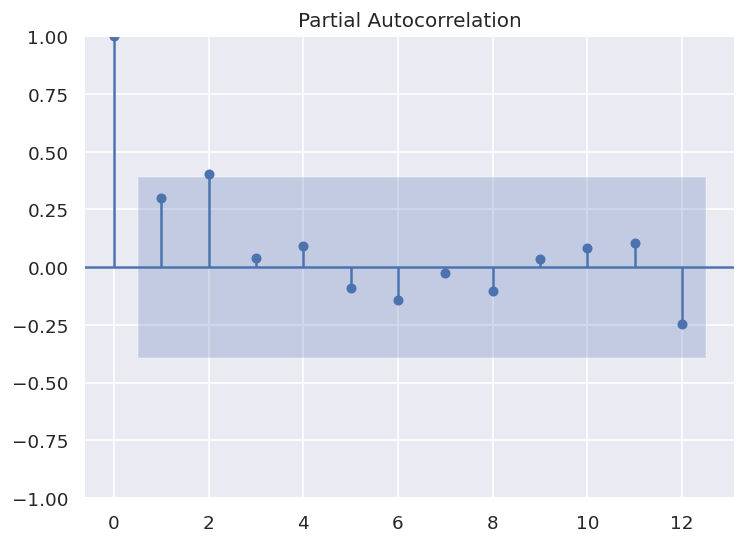

In [44]:
# 3 hyperparameter
# ARIMA (p, d, q)
# AR (p) <- partial autocorrelation -> p = 2
plot_pacf(train_data);

### Tìm MA

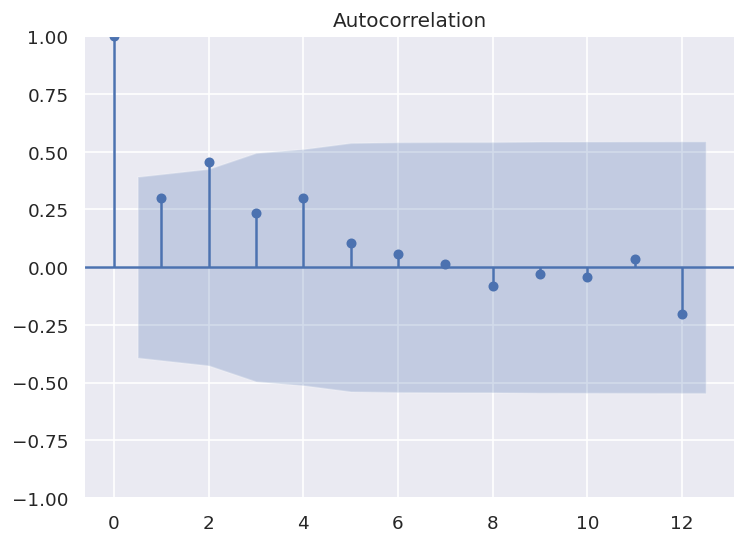

In [45]:
# MA (q) <- autocorrelation -> q = 2
plot_acf(train_data);

## c. Tìm I

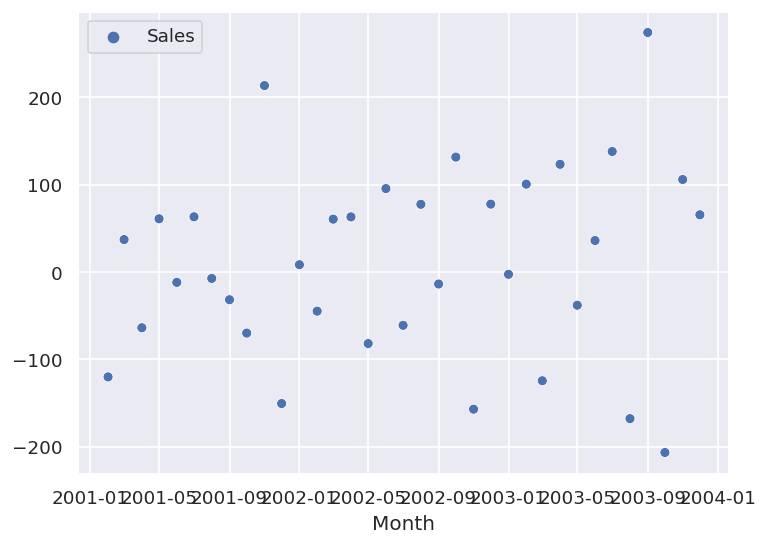

In [46]:
# I (d) -> d = 1
sns.scatterplot(df.diff());

### d. Mô Hình ARIMA

In [47]:
# model
model = ARIMA(train_data, order=(2, 1, 2)) #AR =2, I =1 , MA =2
result = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


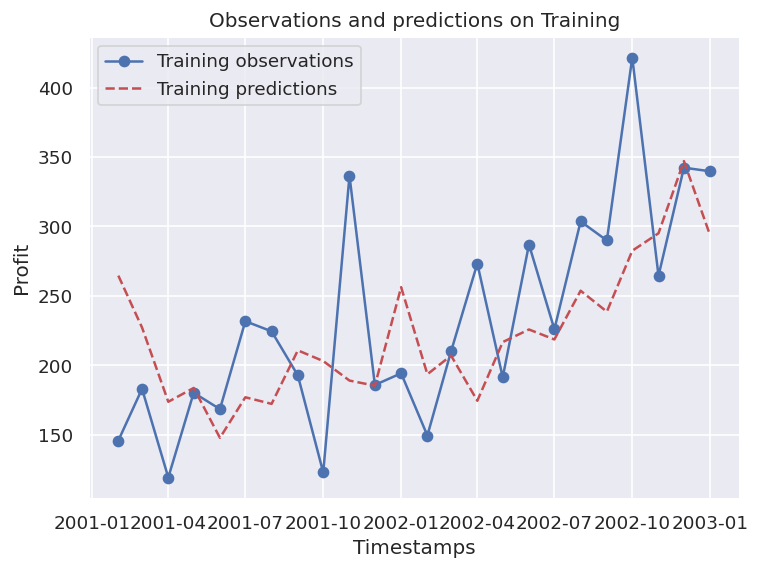

In [48]:
timestamps = train_data.index[1:split_index]
train_obs = train_data[1:]
train_pred = result.predict()[1:]

fig, ax = plt.subplots()
ax.plot(
    timestamps, train_obs, '-o',
    label='Training observations',
    color='b'
)
ax.plot(
    timestamps, train_pred, '--',
    label='Training predictions',
    color='r'
)
ax.legend()
ax.set_xlabel('Timestamps')
ax.set_ylabel('Profit')
ax.set_title('Observations and predictions on Training')
plt.show()

In [49]:
#Đánh giá mô hình
rmse = mean_squared_error(train_obs, train_pred) ** (1/2)
print(rmse)

64.93911951996155


Sai số gần bằng 65

### Dự báo n step (Nâng cấp của ARIMA)

In [50]:
## Forecast n step ahead with update

# https://www.statsmodels.org/dev/examples/notebooks/generated/statespace_forecasting.html#Basic-example
def arima_forecast_with_update(model_params,
                               train, test,
                               step=1, keep_history=True):
    # if not isinstance(train, list):
    #     history = list(train)
    history = train.iloc[:, 0].tolist()
    future = test.iloc[:, 0].tolist()
    forecast = list()

    for t in range(len(test) - step + 1):
        model = ARIMA(
            history,
            order=model_params.get('order', (1, 0, 0)),
            seasonal_order=model_params.get('seasonal_order', (0, 0, 0, 0)),
        )  # define ARIMA model
        fitted_model = model.fit()  # fit ARIMA model
        f = fitted_model.forecast(steps=step)[-1]
        forecast.append(f)
        history.append(future[t])
        if not keep_history:
            keep_history.pop(0)

    return forecast

In [51]:
model_params = {'order': (2, 1, 2),}

forecast = arima_forecast_with_update(model_params, train_data, test_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [52]:
forecast

[340.4302170725076,
 341.8910731579787,
 391.7643008684219,
 340.16703690923,
 423.7136009998252,
 387.95134323486946,
 467.26844614764116,
 530.6055794452883,
 526.9960347743719,
 649.7640436812742,
 607.1381973968918]

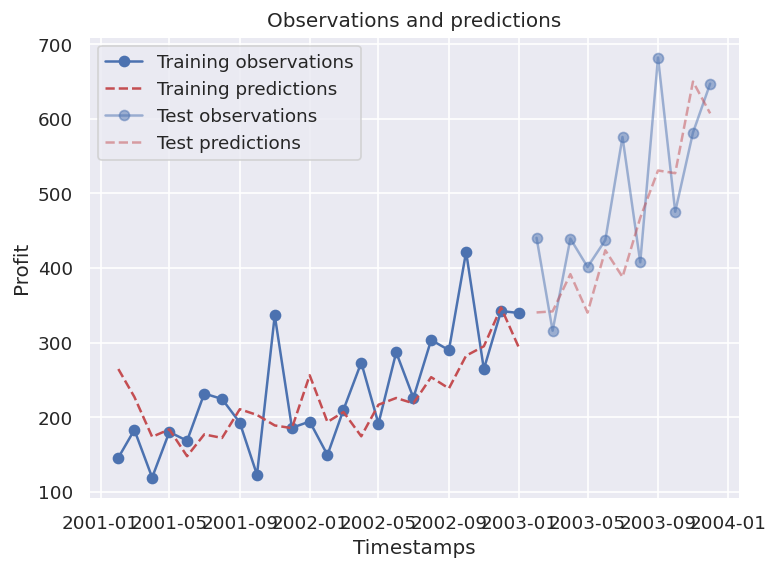

In [53]:
step = 1
train_timestamps = train_data.index[1:split_index]
train_obs = train_data[1:]
train_pred = result.predict()[1:]

test_obs_timestamps = test_data.index
test_obs = test_data
test_pred_timestamps = test_data.index[step - 1:]
test_pred = arima_forecast_with_update(
    model_params, train_data, test_data, step
)

fig, ax = plt.subplots()
ax.plot(
    train_timestamps, train_obs, '-o',
    label='Training observations',
    color='b'
)
ax.plot(
    train_timestamps, train_pred, '--',
    label='Training predictions',
    color='r'
)
ax.plot(
    test_obs_timestamps, test_obs, '-o',
    label='Test observations',
    color='b',
    alpha=0.5,
)
ax.plot(
    test_pred_timestamps, test_pred, '--',
    label='Test predictions',
    color='r',
    alpha=0.5,
)
ax.legend()
ax.set_xlabel('Timestamps')
ax.set_ylabel('Profit')
ax.set_title('Observations and predictions')
plt.show();

In [54]:
rmse = mean_squared_error(test_obs, test_pred) ** (1/2)
print(rmse)

89.16256435107698


Sai số gần bằng 89
